In [61]:
import numpy as np
import pandas as pd
import os

dfRaw=pd.read_excel('C:/Users/user/Desktop/프로젝트/2019-2020 융합형 의사과학자/2020/준비/SHIFTWORK.xlsx')
dfRaw2=pd.read_excel('C:/Users/user/Desktop/프로젝트/2019-2020 융합형 의사과학자/2020/준비/BMI.xlsx')
dfRaw3=pd.read_excel('C:/Users/user/Desktop/프로젝트/2019-2020 융합형 의사과학자/2020/준비/PERSONAL.xlsx')
dfRaw4=pd.read_excel('C:/Users/user/Desktop/프로젝트/2019-2020 융합형 의사과학자/2020/준비/LIFESTYLE.xlsx')

In [110]:

# examtype 10,12,99 지우기; 01, 09만 분석하자
df=dfRaw[ (dfRaw['EXMKND']==1) ]
#dfRaw=dfRaw[ (dfRaw['EXMKND']=='01')| (dfRaw['EXMKND']=='09') ]
print(df['EXMKND'].value_counts())

#dfRaw[['PATNUM', 'ORDDAT']]=dfRaw[['PATNUM', 'ORDDAT']].astype(str)
#PK=dfRaw['PATNUM']+dfRaw['ORDDAT']
#dfRaw['PK']=PK
#df=dfRaw.drop(['PATNUM','EXMDAT','EXMSEQ','EXMKND', 'ORDDAT', 'EDITID'], axis=1)


# SHIFTWORK 행열 재배치
Q1=df[df['QUETYP']==1]
Q2=df[df['QUETYP']==2]
Q3=df[df['QUETYP']==3]
Q4=df[df['QUETYP']==4]
Q6=df[df['QUETYP']==6]
QQ=pd.merge(Q1,Q2,on=['PATNUM'], how='outer', suffixes=['_1', '_2'])
QQQ=pd.merge(QQ,Q3,on=['PATNUM'], how='outer', suffixes=['', '_3'])
QQQQ=pd.merge(QQQ,Q4,on=['PATNUM'], how='outer', suffixes=['', '_4'])
QQQQQ=pd.merge(QQQQ,Q6,on=['PATNUM'], how='outer', suffixes=['', '_6'])
df_shift=pd.DataFrame(QQQQQ)

df_shift=df_shift.drop_duplicates('PATNUM')
df_shift
#print(df_shift['EXMKND'].value_counts())
df_shift.to_excel('df_shift.xlsx') 

1    25807
Name: EXMKND, dtype: int64


In [117]:

#PERSONAL 파일의 열 붙이기
per=dfRaw3[['PATNUM', 'SEXTYP', 'BITDAT', 'CUSTCD' , 'CUSTNM']]
df_shift2=pd.merge(df_shift,per,on=['PATNUM'])

#LIFESTYLE 자료 붙이기
df_life=dfRaw4.drop(['EXMKND', 'ORDDAT', 'EDITID'], axis=1)
df_shift3=pd.merge(df_shift2,df_life,on=['PATNUM']) 

#BMI 열 붙이기
BMI=dfRaw2[['PATNUM', 'BMI']]
df_shift4=pd.merge(df_shift3,BMI,on=['PATNUM'], how='outer')
print(df_shift)
print(df_shift2)


         PATNUM  EXMDAT_1  EXMKND_1  EXMSEQ_1  ORDDAT_1  QUETYP_1 QUEV01_1  \
0     176247250  20190123         1         1  20190125         1        1   
8     116549905  20190118         1         1  20190121         1        1   
16    126610015  20190118         1         1  20190121         1        1   
24    196064361  20190130         1         1  20190130         1        1   
25    196042820  20190121         1         1  20190121         1        1   
...         ...       ...       ...       ...       ...       ...      ...   
6671  186503447  20190806         1         1  20190821         1        2   
6672  196495587  20190806         1         1  20190821         1        4   
6673   96212802  20190806         1         1  20190821         1        2   
6674  126822670  20190903         1         1  20190910         1        2   
6675  196559685  20190903         1         1  20190910         1        3   

     QUEV02_1 QUEV03_1  QUEV04_1  QUEV05_1  QUEV06_1  QUEV07_1 

In [98]:
pd.options.display.max_columns=2000
df_shift4

,PATNUM,EXMDAT_1,EXMKND_1,EXMSEQ_1,ORDDAT_1,QUETYP_1,QUEV01_1,QUEV02_1,QUEV03_1,QUEV04_1,QUEV05_1,QUEV06_1,QUEV07_1,QUEV08_1,QUEV09_1,QUEV11_1,QUEV12_1,QUEV13_1,QUEV14_1,QUEV15_1,QUEV16_1,QUEV17_1,QUEV18_1,QUEV19_1,QUEV20_1,QUEV21_1,QUEV22_1,QUEV23_1,QUEV24_1,RSLT01_1,RSLT02_1,RSLT03_1,RSLT04_1,RSLT05_1,RSLT06_1,RSLT07_1,RSLT08_1,RSLT09_1,RSLTXT_1,EDITID_1,EXMDAT_2,EXMKND_2,EXMSEQ_2,ORDDAT_2,QUETYP_2,QUEV01_2,QUEV02_2,QUEV03_2,QUEV04_2,QUEV05_2,QUEV06_2,QUEV07_2,QUEV08_2,QUEV09_2,QUEV11_2,QUEV12_2,QUEV13_2,QUEV14_2,QUEV15_2,QUEV16_2,QUEV17_2,QUEV18_2,QUEV19_2,QUEV20_2,QUEV21_2,QUEV22_2,QUEV23_2,QUEV24_2,RSLT01_2,RSLT02_2,RSLT03_2,RSLT04_2,RSLT05_2,RSLT06_2,RSLT07_2,RSLT08_2,RSLT09_2,RSLTXT_2,EDITID_2,EXMDAT,EXMKND,EXMSEQ,ORDDAT,QUETYP,QUEV01,QUEV02,QUEV03,QUEV04,QUEV05,QUEV06,QUEV07,QUEV08,QUEV09,QUEV11,QUEV12,QUEV13,QUEV14,QUEV15,QUEV16,QUEV17,QUEV18,QUEV19,QUEV20,QUEV21,QUEV22,QUEV23,QUEV24,RSLT01,RSLT02,RSLT03,RSLT04,RSLT05,RSLT06,RSLT07,RSLT08,RSLT09,RSLTXT,EDITID,EXMDAT_4,EXMKND_4,EXMSEQ_4,ORDDAT_4,QUETYP_4,QUEV01_4,QUEV02_4,QUEV03_4,QUEV04_4,QUEV05_4,QUEV06_4,QUEV07_4,QUEV08_4,QUEV09_4,QUEV11_4,QUEV12_4,QUEV13_4,QUEV14_4,QUEV15_4,QUEV16_4,QUEV17_4,QUEV18_4,QUEV19_4,QUEV20_4,QUEV21_4,QUEV22_4,QUEV23_4,QUEV24_4,RSLT01_4,RSLT02_4,RSLT03_4,RSLT04_4,RSLT05_4,RSLT06_4,RSLT07_4,RSLT08_4,RSLT09_4,RSLTXT_4,EDITID_4,EXMDAT_6,EXMKND_6,EXMSEQ_6,ORDDAT_6,QUETYP_6,QUEV01_6,QUEV02_6,QUEV03_6,QUEV04_6,QUEV05_6,QUEV06_6,QUEV07_6,QUEV08_6,QUEV09_6,QUEV11_6,QUEV12_6,QUEV13_6,QUEV14_6,QUEV15_6,QUEV16_6,QUEV17_6,QUEV18_6,QUEV19_6,QUEV20_6,QUEV21_6,QUEV22_6,QUEV23_6,QUEV24_6,RSLT01_6,RSLT02_6,RSLT03_6,RSLT04_6,RSLT05_6,RSLT06_6,RSLT07_6,RSLT08_6,RSLT09_6,RSLTXT_6,EDITID_6,BMI,SEXTYP,BITDAT,CUSTCD,CUSTNM,QUE011,QUE012,QUE021,QUE031,QUE041,QUE042,QUE043,QUE044,QUE045,QUE046,QUE053,QUE054,QUE055,QUE056,QUE057,QUE058,QUE051,QUE052,QUE061,QT0601,QT0602,QT0603,Q06111,Q06112,Q06121,Q06122,Q06123,Q06124,QT0711,QT0721,QT0722,QT0811,QT0821,QT0822,QT0911
0,176247250,20190123.0,1.0,1.0,20190125.0,1.0,1,1,3,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,특이소견없음,LC,20190123.0,1.0,1.0,20190125.0,2.0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,NaN,0.0,NaN,NaN,6.0,수면의 질이 좋지 않음,2600312,20190123.0,1.0,1.0,20190125.0,3.0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,정상,2600312,20190123.0,1.0,1.0,20190125.0,4.0,5,1,3,1.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,특이소견없음,LC,20190123.0,1.0,1.0,20190125.0,6.0,2,2,12,1.0,1.0,23.0,2.0,1111.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC,NaN,2,19850520.0,H3138,부산교통공사,2222222.0,2222222.0,22222.0,2.0,1.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2.0,0.0,1.0,2.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,2.0,0.0,6.0
1,176247250,20190123.0,1.0,1.0,20190125.0,1.0,1,1,3,3.0,2.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,특이소견없음,LC,20190123.0,1.0,1.0,20190125.0,2.0,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,NaN,0.0,NaN,NaN,6.0,수면의 질이 좋지 않음,2600312,20190123.0,1.0,1.0,20190125.0,3.0,1,1,1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,정상,2600312,20190123.0,1.0,1.0,20190125.0,4.0,5,1,3,1.0,7.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,특이소견없음,LC,20190123.0,1.0,1.0,20190125.0,6.0,2,2,12,1.0,1.0,23.0,2.0,1111.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LC,NaN,2,19850520.0,H3138,부산교통공사,2222222.0,2222222.0,22122.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.

In [118]:
#df_all=df_all.drop(['ORDDAT', 'EXMDAT_1', 'EXMKND', 'EXMKND_1', 'EXMSEQ', 'EXMSEQ_1', 'EDITID_1', 'EDITID_2','EXMDAT', 'EXMDAT_2', 'EXMKND_2', 'EXMSEQ_2'], axis=1)
df_shift4.to_excel('df_shift4.xlsx') # 변수 정리하고 df_all

### 스플릿

In [120]:
import numpy as np
import pandas as pd
import os

df_all=pd.read_excel('D:/data/Machine_Learning/df_all.xlsx')
df_all=pd.DataFrame(df_all)

In [121]:
df_all[['QUE011', 'QUE012', 'QUE021']] = df_all[['QUE011', 'QUE012', 'QUE021']].astype(str)
df_all['PHx_1']=df_all.QUE011.str[0]
df_all['PHx_2']=df_all.QUE011.str[1]
df_all['PHx_3']=df_all.QUE011.str[2]
df_all['PHx_4']=df_all.QUE011.str[3]
df_all['PHx_5']=df_all.QUE011.str[4]
df_all['PHx_6']=df_all.QUE011.str[5]
df_all['PHx_7']=df_all.QUE011.str[6]

df_all['Med_1']=df_all.QUE012.str[0]
df_all['Med_2']=df_all.QUE012.str[1]
df_all['Med_3']=df_all.QUE012.str[2]
df_all['Med_4']=df_all.QUE012.str[3]
df_all['Med_5']=df_all.QUE012.str[4]
df_all['Med_6']=df_all.QUE012.str[5]
df_all['Med_7']=df_all.QUE012.str[6]

df_all['FHx_1']=df_all.QUE021.str[0]
df_all['FHx_2']=df_all.QUE021.str[1]
df_all['FHx_3']=df_all.QUE021.str[2]
df_all['FHx_4']=df_all.QUE021.str[3]
df_all['FHx_5']=df_all.QUE021.str[4]

In [122]:
#노출평가 항목 SPLIT
df_all[['QUEV03_6', 'QUEV06_6', 'QUEV08_6']] = df_all[['QUEV03_6', 'QUEV06_6', 'QUEV08_6']].astype(str)
df_all['QUEV03_6_1']=df_all.QUEV03_6.str[0]
df_all['QUEV03_6_2']=df_all.QUEV03_6.str[1]

df_all['QUEV06_6_load']=df_all.QUEV06_6.str[0]
df_all['QUEV06_6_rest']=df_all.QUEV06_6.str[1]

df_all['QUEV08_6_1']=df_all.QUEV08_6.str[0]
df_all['QUEV08_6_2']=df_all.QUEV08_6.str[1]
df_all['QUEV08_6_3']=df_all.QUEV08_6.str[2]
df_all['QUEV08_6_4']=df_all.QUEV08_6.str[3]
df_all.to_excel('df_all.xlsx')

### df_all 엑셀파일에서 불필요한 행 및 변수 삭제, 변수명 새로 지정 후 df_all2.xlsx 로 저장함

In [21]:
import numpy as np
import pandas as  pd
import os

df_all2=pd.read_excel('D:/data/Machine_Learning/df_all2(변수표포함).xlsx')
df_all2=pd.DataFrame(df_all2)

from datetime import datetime
age=df_all2['BITDAT']/10000
age=age.astype('int')
df_all2['age']=datetime.now().year-age
df_all2['age']
df_all2.to_excel('df_all2.xlsx')

In [2]:
# from datetime import datetime
# now=datetime.today()
# print(now)

# df_final['dob']=pd.to_datetime(df_final['BITDAT'], format='%Y%m%d').dt.strftime('%Y-%m-%d')
# df_final['dob']=df_final['dob'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))
# print(df_final['dob'])

# df_final['now']=now
# df_final['now']=pd.to_datetime(df_final['now'])
# print(df_final['now'])
# df_final['diff_days']=df_final['now']-df_final['dob']
#일수 차이를 연도로 바꾸고 +1 해주면 연령

In [22]:
!git init

Reinitialized existing Git repository in D:/data/Machine_Learning/.git/


In [23]:
!git remote add origin https://github.com/saemi-jung/scikit-learn.git

fatal: remote origin already exists.


In [24]:
!git config core.autocrlf true
!git add .

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [25]:
!git commit -m "."

[master 21fc8bd] .
 4 files changed, 48 insertions(+), 82 deletions(-)
 copy df_all2.xlsx => "df_all2(\353\263\200\354\210\230\355\221\234\355\217\254\355\225\250).xlsx" (100%)
 rewrite df_all2.xlsx (78%)


In [26]:
!git push origin master

remote: This repository moved. Please use the new location:        
remote:   https://github.com/saemi-jung/scikit-learn.git        
To https://github.com/saemi-jung/ML.git
   7aff725..21fc8bd  master -> master


In [11]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   shiftwork.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	data.xlsx
	data_final.xlsx
	df_all.xlsx

no changes added to commit (use "git add" and/or "git commit -a")


### basic stat

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as  pd
import os
# df_test: 변수 몇개만 추출해서 돌려보기
df_final=pd.read_excel('D:/data/Machine_Learning/df_test.xlsx')
df_final=pd.DataFrame(df_final)

In [11]:
#df_final.head()
#df_final.INSOMN_T.value_counts()
#df_final.isnull().sum(axis=0)

Unnamed: 0     0
PK             0
PATNUM         0
SEXTYP         0
BITDAT         0
              ..
WORKOUT_6     42
WORKOUT_7     43
dob            0
now            0
diff_days      0
Length: 133, dtype: int64

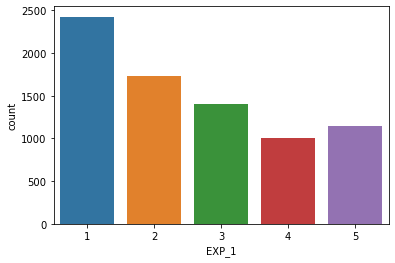

In [33]:
sns.countplot(x='EXP_1', data=df_final)
plt.show()

In [35]:
pd.options.display.max_columns=2000
df_final.head()

,PATNUM,SEXTYP,BITDAT,BMI,CUSTCD,CUSTNM,QUETYP_1,INSOMN_1,INSOMN_2,INSOMN_3,INSOMN_4,INSOMN_5,INSOMN_6,INSOMN_7,INSOMN_T,INSOMN_R,QUALITY,QUALITY_1,QUALITY_2,QUALITY_3,QUALITY_4,QUALITY_5,QUALITY_6,QUALITY_7,QUALITY_8,QUALITY_9,QUALITY_10,QUALITY_11,QUALITY_12,QUALITY_13,QUALITY_14,QUALITY_15,QUALITY_16,QUALITY_17,QUALITY_18,QUALITY_19,QUALITY_20,QUALITY_21,QUALITY_22,QUALITY_T,QUALITY_R,DAYSLP,DAYSLP_1,DAYSLP_2,DAYSLP_3,DAYSLP_4,DAYSLP_5,DAYSLP_6,DAYSLP_7,DAYSLP_8,DAYSLP_T,DAYSLP_R,GIPRBM,GIPRBM_1,GIPRBM_2,GIPRBM_3,GIPRBM_4,GIPRBM_5,GIPRBM_6,GIPRBM_7,GIPRBM_T,RSLTXT_R,EXP,EXP_1,EXP_2,EXP_3,EXP_4,EXP_5,EXP_6,EXP_7,EXP_8,EXP_9,EXP_10,EXP_11,EXP_12,EXP_13,EXP_14,PHx_1,PHx_2,PHx_3,PHx_4,PHx_5,PHx_6,PHx_7,Med_1,Med_2,Med_3,Med_4,Med_5,Med_6,Med_7,FHx_1,FHx_2,FHx_3,FHx_4,FHx_5,HBV,SMOKING_1,SMOKING_2,SMOKING_3,SMOKING_4,SMOKING_5,SMOKING_6,SMOKING_7,SMOKING_8,SMOKING_9,SMOKING_10,SMOKING_11,SMOKING_12,SMOKING_13,SMOKING_14,N,DRK_1,DRK_2,DRK_3,DRK_4,DRK_5,DRK_6,DRK_7,DRK_8,DRK_9,WORKOUT_1,WORKOUT_2,WORKOUT_3,WORKOUT_4,WORKOUT_5,WORKOUT_6,WORKOUT_7,age
0,176247250,2,19850520,NaN,H3138,부산교통공사,1,1,1,3,3,2,1,2,6.0,특이소견없음,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,수면의 질이 좋지 않음,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,정상,4,5,1,3,1,7,1,1,0.0,특이소견없음,6,2,2,1,2,1,1,2,3,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0.0,0.0,0.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,2,0,1,2.0,0.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,3.0,1.0,0.0,4.0,2.0,0.0,6.0,35
1,176247250,2,19850520,NaN,H3138,부산교통공사,1,1,1,3,3,2,1,2,6.0,특이소견없음,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0,수면의 질이 좋지 않음,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,정상,4,5,1,3,1,7,1,1,0.0,특이소견없음,6,2,2,1,2,1,1,2,3,2,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,2,0,1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,4.0,2.0,0.0,3.0,35
2,116549905,1,19660215,NaN,H1373,(주)DRB 동일,1,1,1,1,1,3,3,3,6.0,특이소견없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1,1,1,1,1,1,0.0,특이소견없음,6,5,2,1,1,1,1,1,1,2,2,2,1,1,4,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0.0,0.0,0.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,2,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,3.0,54
3,116549905,1,19660215,NaN,H1373,(주)DRB 동일,1,1,1,1,1,3,3,3,6.0,특이소견없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1,1,1,1,1,1,0.0,특이소견없음,6,5,2,1,1,1,1,1,1,2,2,2,1,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,2,0,1,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,NaN,30.0,1.0,NaN,30.0,3.0,54
4,116549905,1,19660215,NaN,H1373,(주)DRB 동일,1,1,1,1,1,3,3,3,6.0,특이소견없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,1,1,1,1,1,1,0.0,특이소견없음,6,5,2,1,1,1,1,1,1,2,2,2,1,1,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,2,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,2.0,1.0,0.0,3.0,54


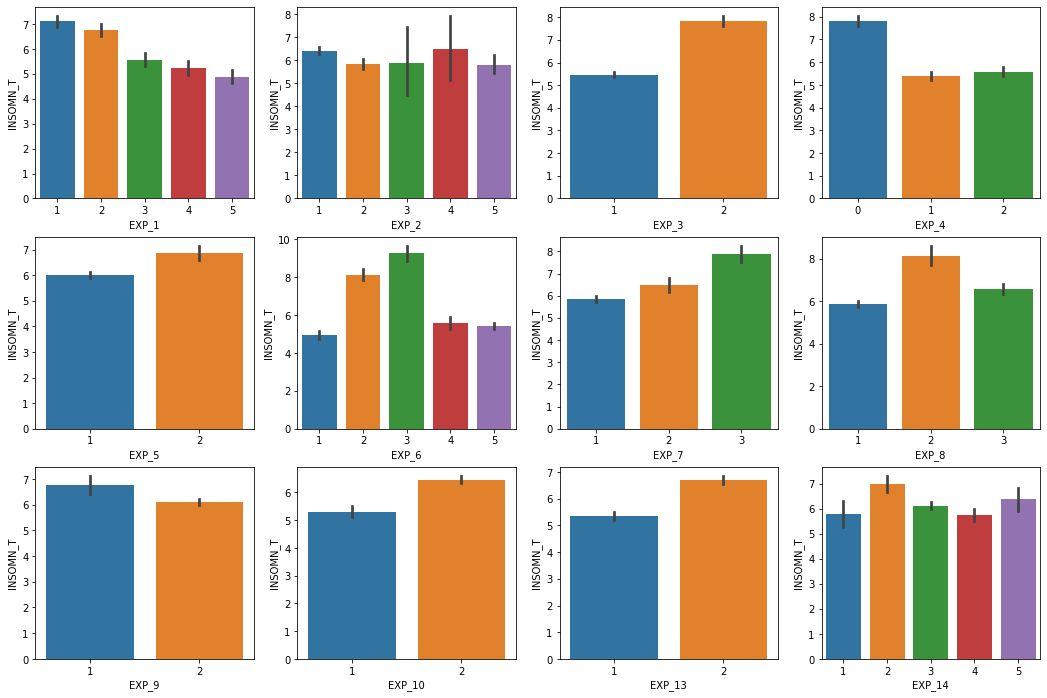

In [60]:
# y = 'INSOMN_T'
#plt.plot('EXP_1', 'INSOMN_T', data=df_final)

#ax=sns.scatterplot(x='EXP_1', y='INSOMN_T', data=df_final)

fig, axes= plt.subplots(3,4, figsize=(18,12))
sns.barplot(ax=axes[0,0], x='EXP_1', y='INSOMN_T', data=df_final) # 교대근무 기간
sns.barplot(ax=axes[0,1], x='EXP_2', y='INSOMN_T', data=df_final) # 방식(3,2,격,고정,불규칙)
sns.barplot(ax=axes[0,2], x='EXP_3', y='INSOMN_T', data=df_final) # 순환근무여부 (예, 아니오)
sns.barplot(ax=axes[0,3], x='EXP_4', y='INSOMN_T', data=df_final) # 순환근무 정방향(순환 아님,예, 아니오)
sns.barplot(ax=axes[1,0], x='EXP_5', y='INSOMN_T', data=df_final) # 퇴근후 11시간 이상 휴식 (예, 아니오)
sns.barplot(ax=axes[1,1], x='EXP_6', y='INSOMN_T', data=df_final) # 연속 야간작업 일수 (1,2,3,4,5일이상)
sns.barplot(ax=axes[1,2], x='EXP_7', y='INSOMN_T', data=df_final) # 야간 작업 로딩 (비슷, 적음, 더 많음)
sns.barplot(ax=axes[1,3], x='EXP_8', y='INSOMN_T', data=df_final) # 야간 휴식시간 (비슷, 적음, 더 많음)
sns.barplot(ax=axes[2,0], x='EXP_9', y='INSOMN_T', data=df_final) # 야간 고립 (예 아니오)
sns.barplot(ax=axes[2,1], x='EXP_10', y='INSOMN_T', data=df_final) # 수면 허용 (예, 아니오)
sns.barplot(ax=axes[2,2], x='EXP_13', y='INSOMN_T', data=df_final) # 일정조정 허용 (예, 아니오)
sns.barplot(ax=axes[2,3], x='EXP_14', y='INSOMN_T', data=df_final) # 근무시간 (40미만, 40, 52미, 52이, 60이상)

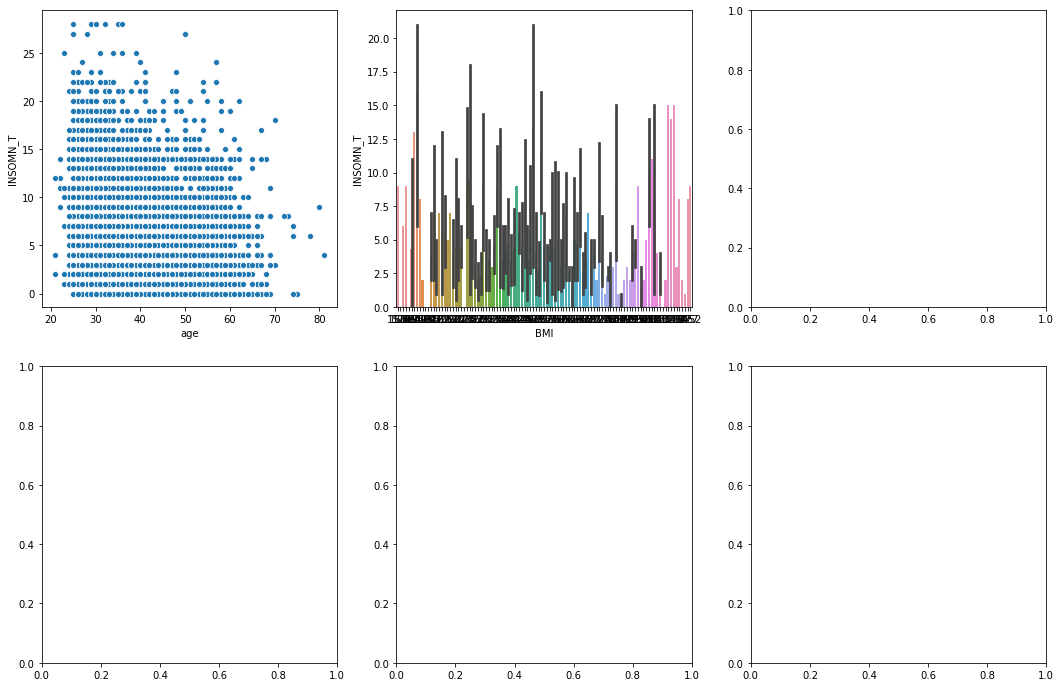

In [66]:

fig, axes= plt.subplots(2,3, figsize=(18,12))
sns.scatterplot(ax=axes[0,0], x='age', y='INSOMN_T', data=df_final) 
sns.barplot(ax=axes[0,1], x='BMI', y='INSOMN_T', data=df_final) 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split